In [ ]:
!pip install Hazm
!pip install BeautifulSoup4
!pip install pandas
!pip install numpy
!pip install NLTK
!pip install scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/final_data.xlsx")
selected_columns = df[['عنوان','کلیدواژه']].dropna()
article_titles = selected_columns['عنوان'].tolist()
article_keywords = selected_columns['کلیدواژه'].tolist()
articles = [title +''.join(keywords) for title, keywords in zip(article_titles, article_keywords)]
df['Combined'] = df['عنوان'].astype(str) + df['کلیدواژه']
combined_articles = df['Combined'].tolist()
print(article_titles)
print(articles,sep='\n')
print(combined_articles)

['جرم انگاری در زمینه حق دسترسی به انرژی در ایران و آمریکا', 'انسانی شدن حقوق بین الملل و تاثیر آن بر ساختار حقوق بین الدول', 'رویکرد جهان سوم به حقوق بین الملل', 'حق اعتصاب در حقوق بین الملل و جایگاه آن در حقوق ایران', 'ژاک دریدا و واسازی حقوق بین\u200cالملل', 'هوش مصنوعی و حقوق بین الملل', 'مهجوریت حقوق بین الملل فضا در حقوق بین الملل عام و نمود آن در حکمرانی جهانی فضایی', 'اصل برابری در حقوق کیفری ایران', 'تأثر حقوق بین الملل محیط زیست از حقوق نرم', 'چالش\u200cهای صیانت از حق ها و آزادیهای بنیادین در نظام حقوق اساسی افغانستان', 'سلب مالکیت از حقوق مالکیت صنعتی', 'بررسی انتقادی توسعه نظام بین\u200c المللی حقوق بشر به شرکت\u200c\u200cهای فراملی', 'تبارشناسی اعلامیه جهانی حقوق بشر به مثابه فراروایتی تکثربنیاد', 'یکسان/هماهنگ\u200cسازی حقوق قراردادهای بین\u200cالمللی مالکیت فکری؛ ضرورت\u200cها و چالش\u200cها', 'تعامل حقوق سازمان جهانی تجارت با حقوق داخلی کشورهای عضو', 'حق دادرسی عادلانه در فضای مجازی با تاکید بر حقوق ایران', 'کارگران مهاجردرحقوق بین الملل حقوق بشر با نگاهی به وضعیت دولت

In [ ]:
from hazm import *
stops =  set(open("/content/drive/MyDrive/PersianStopWords.txt").read().split())
normalizer = Normalizer()
tokenizer = WordTokenizer()
lemmatizer = Lemmatizer()
stemmer = Stemmer()
persianStop = set()
for stop in stops:
  stop = normalizer.unicodes_replacement(stop)
  persianStop.add(stop)
print(stops)
print(persianStop)
print(stops.difference(persianStop))







{'ساخته', 'ميليارد', '،', 'همین', 'سوي', '"', 'کن', 'بين', 'يك', 'آوردن', 'با', 'گفتن', 'توانست', 'هست', 'آمد', 'باشد', 'ّه', 'خواهند', 'دار', 'روي', 'طي', '/', 'اينكه', 'چرا', 'بالایِ', 'دنبالِ', 'كمتر', 'اثرِ', 'وگو', 'داده', 'كنيم', 'خويش', 'هستند', 'نزديك', 'دیگر', 'ناشي', 'بيشتري', 'تولِ', 'چه', 'وقتي', 'از', 'دادند', 'تر', 'تمام', 'َ', 'كردند', 'بعضي', 'مردم', '؛', 'پاعینِ', 'ريزي', 'هنگام', 'مثلِ', ')', 'گوی', 'خیاه', 'کجاست', 'برخوردار', 'تحت', 'بروز', 'مرسی', 'تاكنون', 'یافتن', 'آباد', 'چهار', 'تواند', 'گفت', 'رفت', 'اين', '…', 'شده', 'ً', 'کجا', 'همان', 'شايد', 'هر', 'گويد', 'آری', 'برداري', 'آنجا', 'گذاشته', 'چیز', 'اول', 'ديگر', '۹', 'دارند', 'بيست', 'نخست', 'كردم', 'بلی', 'براساس', '*', 'هنگامِ', 'زير', 'زيرا', 'چندین', 'بالا', 'ٍ', 'دارد', 'آمدن', 'ٔ', 'تان', 'آورده', '(', 'لطفاً', 'امسال', 'دانند', 'آورد', 'بيش', 'نبود', 'كرده', 'آنكه', 'توانند', 'او', 'سازي', 'آنان', 'مختلف', 'دهد', 'شما', 'آور', 'تمامي', 'در', 'قابل', 'ٰ', 'طريق', 'باشند', 'رویِ', 'فوق', 'همچنين', '-',

In [ ]:

def title_to_words( raw_title):
    raw_title = normalizer.normalize(raw_title)
    raw_tokens = tokenizer.tokenize(raw_title)
    tokens = []
    for token in raw_tokens:
      token = normalizer.normalize(token)
      token = normalizer.unicodes_replacement(token)
      token = normalizer.persian_style(token)
     # token = stemmer.stem(token)
      print(token)
  #    token = stemmer.stem(token)
      tokens.append(token)
    meaningful_words = [w for w in tokens if not w in persianStop]
    return( " ".join( meaningful_words ))

words_titles = title_to_words(article_titles[0])
print(words_titles)

جرم
انگاری
در
زمینه
حق
دسترسی
به
انرژی
در
ایران
و
آمریکا
جرم انگاری زمینه دسترسی انرژی ایران آمریکا


In [ ]:
num_titles = len(article_titles)
clean_titles = []
for i in range( 0, num_titles ):
    clean_titles.append( title_to_words( article_titles[i] ) )
print(clean_titles)
print(len(clean_titles))


جرم
انگاری
در
زمینه
حق
دسترسی
به
انرژی
در
ایران
و
آمریکا
انسانی
شدن
حقوق
بین‌الملل
و
تاثیر
آن
بر
ساختار
حقوق
بین‌الدول
رویکرد
جهان
سوم
به
حقوق
بین‌الملل
حق
اعتصاب
در
حقوق
بین‌الملل
و
جایگاه
آن
در
حقوق
ایران
ژاک
دریدا
و
واسازی
حقوق
بین‌الملل
هوش
مصنوعی
و
حقوق
بین‌الملل
مهجوریت
حقوق
بین‌الملل
فضا
در
حقوق
بین‌الملل
عام
و
نمود
آن
در
حکمرانی
جهانی
فضایی
اصل
برابری
در
حقوق
کیفری
ایران
تأثر
حقوق
بین‌الملل
محیط‌زیست
از
حقوق
نرم
چالش‌های
صیانت
از
حق‌ها
و
آزادیهای
بنیادین
در
نظام
حقوق
اساسی
افغانستان
سلب
مالکیت
از
حقوق
مالکیت
صنعتی
بررسی
انتقادی
توسعه
نظام
بین‌المللی
حقوق
بشر
به
شرکت‌های
فراملی
تبارشناسی
اعلامیه
جهانی
حقوق
بشر
به
مثابه
فراروایتی
تکثربنیاد
یکسان
/
هماهنگ‌سازی
حقوق
قراردادهای
بین‌المللی
مالکیت
فکری
؛
ضرورت‌ها
و
چالش‌ها
تعامل
حقوق
سازمان
جهانی
تجارت
با
حقوق
داخلی
کشورهای
عضو
حق
دادرسی
عادلانه
در
فضای
مجازی
با
تاکید
بر
حقوق
ایران
کارگران
مهاجردرحقوق
بین‌الملل
حقوق
بشر
با
نگاهی
به
وضعیت
دولت‌های
عربی
عراق
وحوزه‌ی
خلیج‌فارس
تحولات
حقوق
جنگ
در
سیاق
اجتماعی
جدید
شاخص‌های
مداخله
قضایی-
ک

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 250)
train_data_features = vectorizer.fit_transform(clean_titles)
#train_data_features = train_data_features.toarray()
print(train_data_features[0])
print(train_data_features.shape)
vocab = vectorizer.get_feature_names_out()
print(vocab)

  (0, 83)	1
  (0, 125)	1
  (0, 30)	1
  (0, 36)	1
  (0, 4)	1
(389, 250)
['آثار' 'آراء' 'آزادی' 'آلمان' 'آمریکا' 'آیین' 'اتحادیه' 'اجتماعی' 'اجرای'
 'اختراع' 'اداری' 'ارزیابی' 'اروپا' 'اروپایی' 'اساسی' 'استانداردهای'
 'اسلامی' 'اسناد' 'اصل' 'اصول' 'اعمال' 'افغانستان' 'اقتصاد' 'اقتصادی'
 'الملل' 'المللی' 'الگوی' 'امنیت' 'امکان' 'انتقال' 'انرژی' 'انسانی'
 'انگلستان' 'انگلیس' 'ای' 'ایالات' 'ایران' 'بازرگانی' 'بانکی' 'بحران'
 'بخش' 'بدهی' 'بررسی' 'برق' 'برنامه' 'بشر' 'بشردوستانه' 'بشری' 'بنیادین'
 'بیع' 'بیمه' 'بین' 'تأکید' 'تابعیت' 'تاثیر' 'تاکید' 'تجارت' 'تجاری'
 'تحقق' 'تحلیل' 'تحول' 'تحولات' 'تروریستی' 'ترویج' 'ترکیه' 'تریپس' 'تضمین'
 'تطبیق' 'تطبیقی' 'تعامل' 'تعدیل' 'تعهدات' 'تعیین' 'تغییرات' 'تفسیری'
 'تنظیم' 'توسعه' 'تکالیف' 'جامعه' 'جایگاه' 'جبران' 'جرائم' 'جرایم' 'جرم'
 'جزای' 'جمهوری' 'جنایی' 'جهانی' 'حاکم' 'حاکمیت' 'حق' 'حقوق' 'حقوقی' 'حل'
 'حمایت' 'حوزه' 'حکومت' 'خارجی' 'خاص' 'خانواده' 'خانگی' 'خسارات' 'خسارت'
 'خشونت' 'داخلی' 'دادرسی' 'دادگاه' 'دادگستری' 'داوری' 'دریافت' 'دریایی

1494.920308569999


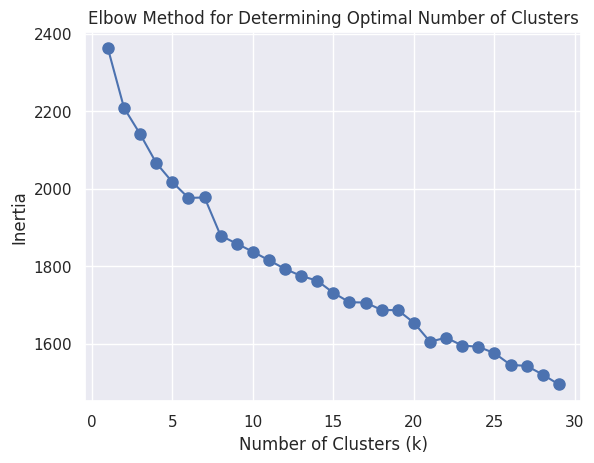

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()
data = train_data_features.toarray()
#print(data)

inertia = []
k_values = range(1, 30)
for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=9)
    kmeans.fit(train_data_features)
    inertia.append(kmeans.inertia_)
print(kmeans.inertia_)
plt.figure()
plt.plot(k_values, inertia, 'bo-', markersize=8)
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
num_clusters = 6
min=100000.1
j=1
for i in range(1,1000):
  kmeans1 = KMeans(n_clusters=num_clusters, random_state=i)
  kmeans1.fit(train_data_features)
  if min> (kmeans1.inertia_) :
    min = kmeans1.inertia_
    j=i
print(j)

24


In [ ]:
# Perform K-means clustering
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters,random_state=24)
kmeans.fit(train_data_features)

identified_clusters = kmeans.fit_predict(train_data_features)
print(identified_clusters)

# Get cluster labels
cluster_labels = kmeans.labels_

# Print the clustering results
i0=0
i1=0
i2=0
i3=0
for title, label in zip(article_titles, cluster_labels):
  if label == 0 :
    print(f"Article: '{title}' --> Cluster: {label}")
    i0=i0+1
print(i0)

for title, label in zip(article_titles, cluster_labels):
  if label == 1 :
    print(f"Article: '{title}' --> Cluster: {label}")
    i1=i1+1
print(i1)

for title, label in zip(article_titles, cluster_labels):
  if label == 2 :
    print(f"Article: '{title}' --> Cluster: {label}")
    i2=i2+1
print(i2)

for title, label in zip(article_titles, cluster_labels):
  if label == 3 :
    print(f"Article: '{title}' --> Cluster: {label}")
    i3=i3+1
print(i3)

print(i0)
print(i1)
print(i2)
print(i3)


[0 5 5 5 5 5 5 2 5 4 4 3 4 3 4 2 5 4 4 5 5 3 4 5 3 4 4 4 3 4 4 0 2 4 4 5 5
 0 2 2 2 3 3 0 4 2 4 0 0 0 3 5 5 0 1 3 5 1 5 5 4 2 3 3 4 3 4 2 0 5 2 2 4 5
 3 3 4 2 2 2 3 3 5 5 4 2 1 5 2 3 4 5 4 5 3 5 5 0 2 2 0 4 4 2 4 5 4 2 5 4 4
 4 5 2 4 5 4 4 2 2 2 3 3 2 5 2 4 2 2 3 2 4 4 2 5 4 5 2 2 2 3 5 2 2 4 4 4 2
 4 2 5 2 5 2 3 5 2 4 2 4 2 4 4 2 3 5 5 4 4 4 2 4 4 4 5 5 4 5 3 4 5 2 4 2 4
 5 4 2 2 2 4 5 4 4 4 4 2 4 2 3 3 5 2 2 5 2 4 3 2 4 4 5 3 4 1 2 4 4 5 2 4 2
 4 5 3 5 4 2 4 4 2 5 1 4 5 4 2 2 4 4 2 2 2 4 4 5 4 2 4 4 1 2 2 1 2 2 4 5 2
 3 3 4 4 1 4 2 2 4 2 1 2 2 4 4 4 4 5 2 1 2 4 4 4 2 4 3 2 2 4 4 5 5 3 3 4 2
 0 2 2 2 2 5 4 0 0 0 0 1 0 3 0 1 0 3 3 0 3 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 3 1 3 0 3 0 1 0 0 3 1 1 0 0 0 0 0 1 0 0 0 0 3 3 3 3 1 0 3 0 0 0 0 0 3
 0 1 0 3 0 0 0 0 0 0 0 0 3 0 0 0 0 1 0]
Article: 'جرم انگاری در زمینه حق دسترسی به انرژی در ایران و آمریکا' --> Cluster: 0
Article: 'اصل تقسیم منافع در بهره برداری از رودخانه های فرامرزی' --> Cluster: 0
Article: 'اساسی‌گرایی در عصر دیجیتال' --> Clust

In [ ]:
data_with_clusters = selected_columns.copy()
data_with_clusters['Cluster'] = identified_clusters
print(data_with_clusters)

                                                 عنوان  \
0    جرم انگاری در زمینه حق دسترسی به انرژی در ایرا...   
1    انسانی شدن حقوق بین الملل و تاثیر آن بر ساختار...   
2                    رویکرد جهان سوم به حقوق بین الملل   
3    حق اعتصاب در حقوق بین الملل و جایگاه آن در حقو...   
4                    ژاک دریدا و واسازی حقوق بین‌الملل   
..                                                 ...   
389  تحلیل الزامات زیست محیطی و ضمانت‌اجراهای مرتبط...   
390  تحلیل برون سپاری در صنعت نفت و گاز ایران؛ چالش...   
391  علت شناسی بزه دیدگی زنان در حوزه جرائم مالی ؛ ...   
392  بررسی تطبیقی خسارات غیرقطعی در نظام های حقوقی ...   
393                   قواعد عمومی مسؤولیت مدنی حرفه‌ای   

                                              کلیدواژه  Cluster  
0                      حق دسترسی به انرژی، حقوق تطبیقی        0  
1    طبیعی‌گرایان، بشریت، پوزیتیویسم حقوقی، حقوق بی...        5  
2    جهان سوم، استعمار، حقوق بشر، حقوق بین الملل مح...        5  
3    حق اعتصاب، حقوق بشر، حقوق کار، حقو

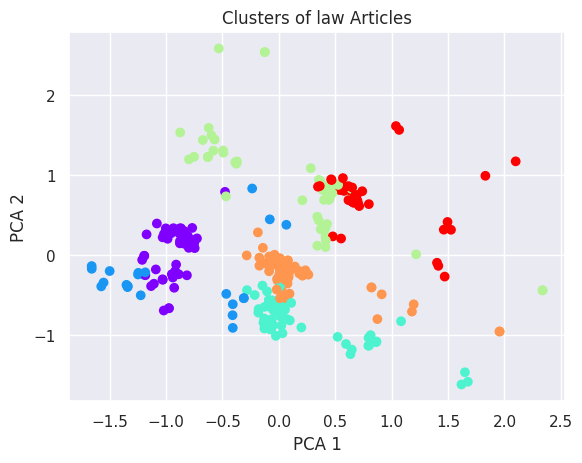

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)
#print(pca_result)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.title("Clusters of law Articles")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()



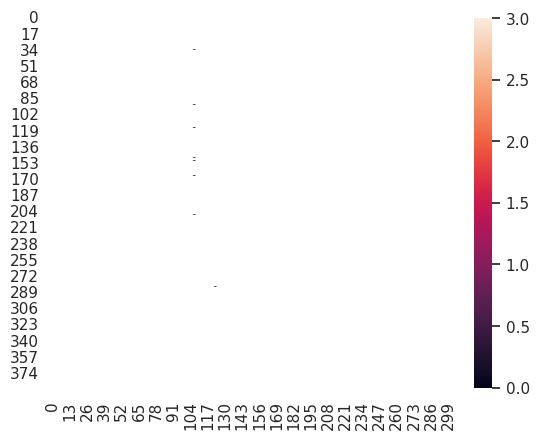

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean, pdist, squareform

def similarity_func(u, v):
    return 1/(1+euclidean(u,v))

dists = pdist(data, similarity_func)
similarity_matrix = pd.DataFrame(data)
sns.heatmap(similarity_matrix, annot=True)
plt.show()

# New Section